# Analyze Return and Risk

This notebook aims at analyzing the return and risks of certain stocks and and potfolio.

## Import data and libraries

In [34]:
from pandas_datareader import data as wb
import pandas as pd
import seaborn as sns
import numpy as np

# Library for plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
params = {
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 18

}
rcParams.update(params)
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi'] = 100

In [35]:
df = wb.DataReader('GOOGL', data_source='yahoo', start='2000-1-1')

In [36]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055


Text(0.5, 1.0, 'Adjusted close')

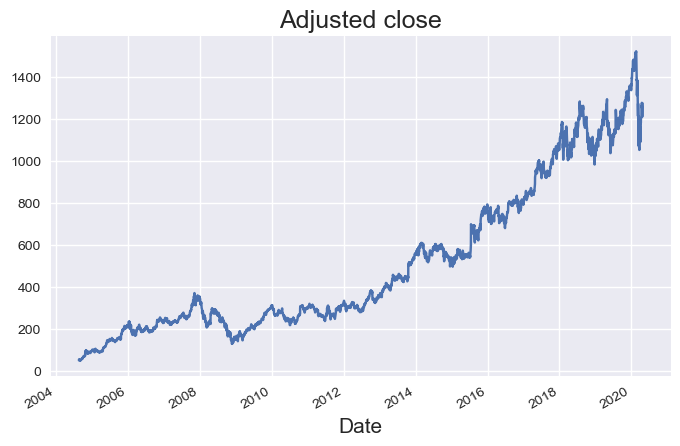

In [37]:
df['Adj Close'].plot(figsize=(8,5))
plt.title('Adjusted close')

## Single stock return

Text(0.5, 1.0, 'Simple return')

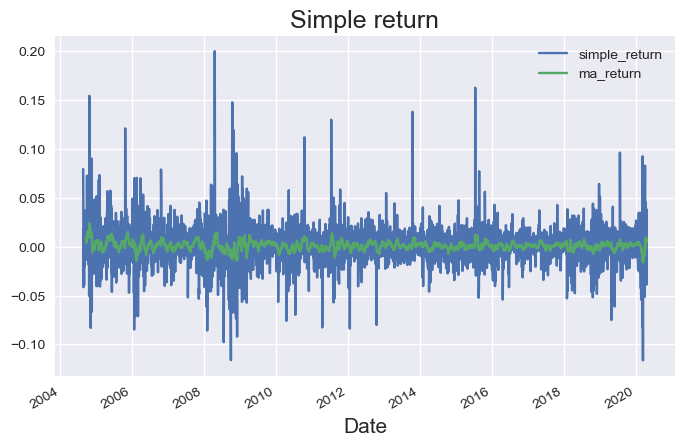

In [38]:
df['simple_return'] = (df['Adj Close']/df['Adj Close'].shift(1))-1
df['ma_return'] = df['simple_return'].rolling(window=20).mean()
df[['simple_return','ma_return']].plot(figsize=(8,5))
plt.title('Simple return')

In [39]:
avg_return_d = df['simple_return'].mean()
print("Daily average return: %.5f%%"%(avg_return_d*100))

Daily average return: 0.10040%


In [40]:
avg_return_a = avg_return_d*250
print("Anual average return: %.5f%%"%(avg_return_a*100))

Anual average return: 25.09980%


## Portfolio return

In [41]:
stocks = ['GOOGL','PG',"AAPL","^GSPC"]
df_mix = pd.DataFrame()
for t in stocks:
    df_mix[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

Text(0.5, 1.0, 'Price chart')

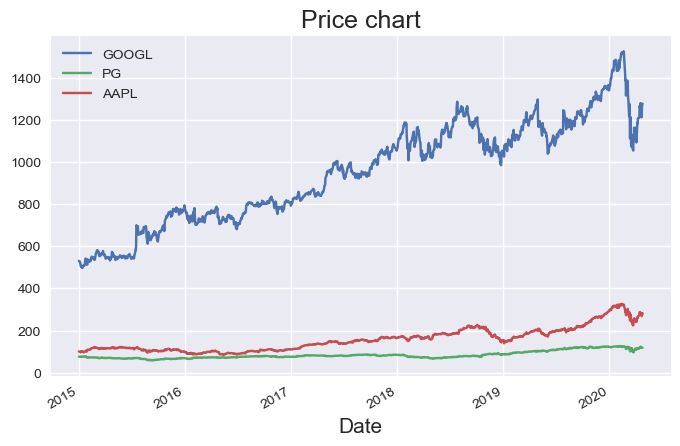

In [42]:
df_mix[['GOOGL','PG',"AAPL"]].plot(figsize=(8,5))
plt.title('Price chart')

Text(0.5, 1.0, '% increase')

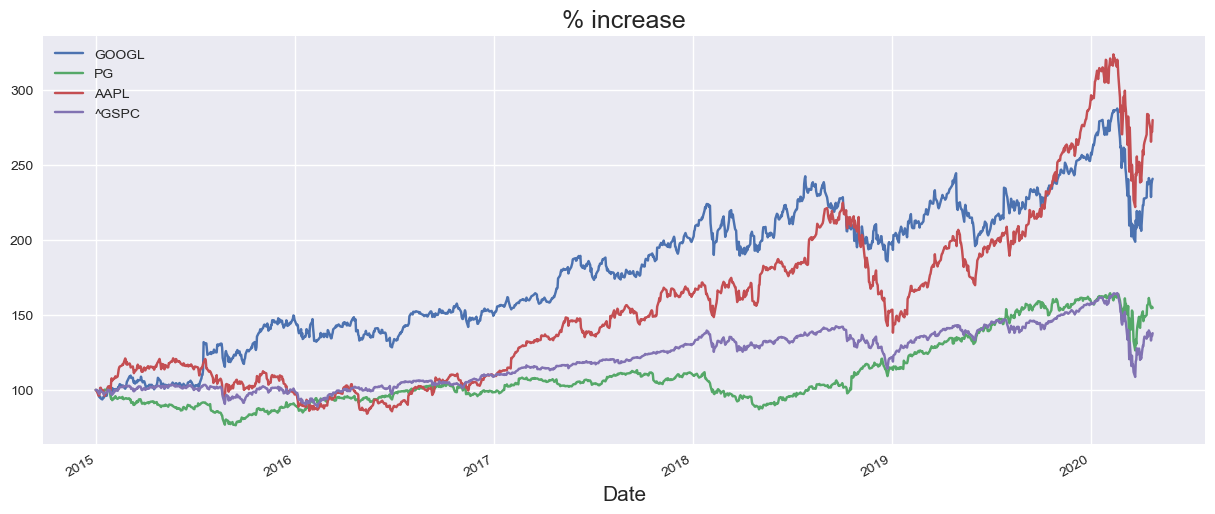

In [43]:
(df_mix/df_mix.iloc[0]*100).plot(figsize=(15,6))
plt.title('% increase')

## Risk

In [44]:
df_mix_return = df_mix[stocks]/df_mix[stocks].shift(1)-1

In [45]:
print("Return")
df_mix_return.mean()*100*250

Return


GOOGL    19.867819
PG       10.091070
AAPL     23.288081
^GSPC     7.709218
dtype: float64

In [46]:
print('Std')
df_mix_return.std()*100*250**0.5

Std


GOOGL    26.327683
PG       19.759999
AAPL     28.439642
^GSPC    18.475086
dtype: float64

Text(0.5, 1, 'Pair-wise correlation')

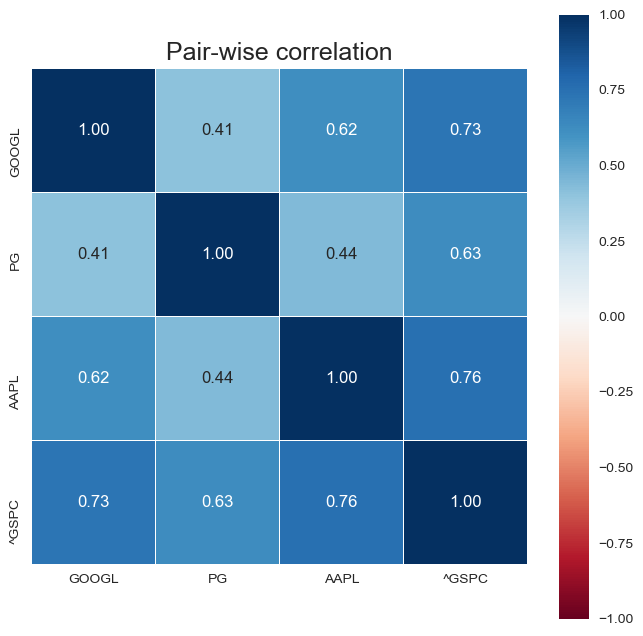

In [47]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
sns.heatmap(df_mix_return[stocks].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True,fmt=".2f")
plt.title('Pair-wise correlation')

## Portfolio risk

In [48]:
w = np.array([0.5, 0.25, 0.25])

In [49]:
portfolio_var = np.dot(w.T, np.dot(df_mix_return[['GOOGL','PG',"AAPL"]].cov()*250,w))
print("Variance: ",portfolio_var)
print("Volatitlity: %.3f%%"%(portfolio_var**0.5*100))

Variance:  0.04484904187705534
Volatitlity: 21.178%


## Diversifiable and Non-diversifiable risk

In [50]:
stock1_var = df_mix_return['GOOGL'].var()*250
stock2_var = df_mix_return['PG'].var()*250
stock3_var = df_mix_return['AAPL'].var()*250

In [51]:
dr = portfolio_var - (w[0]**2*stock1_var) - (w[1]**2*stock2_var) - (w[2]**2*stock3_var)
print("Diversifiable risk: %.2f%%"%(dr**0.5*100))

Diversifiable risk: 14.15%
